# Performance Metrics

**Higher Risk must be rewarded with higher Returns**

In [ ]:
!pip install yfinance

In [59]:
import pandas as pd
import numpy as np 
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt 
pd.options.display.float_format = '{:.4f}'.format 
plt.style.use('seaborn')

## WMT returns 

In [ ]:
ticker = "WMT"
start = '2018-12-01'
end = '2021-12-01'
wmt = yf.download(ticker,start,end)

In [61]:
wmt.describe()

,Open,High,Low,Close,Adj Close,Volume
count,754.0000,754.0000,754.0000,754.0000,754.0000,754.0000
mean,125.2586,126.3363,124.2537,125.2768,122.2763,7772765.5172
std,17.2747,17.3300,17.1880,17.2037,18.4129,4146860.2276
min,86.4200,87.5700,85.7800,85.8200,81.4402,2227400.0000
25%,113.7150,114.8175,112.2375,113.9050,109.9174,5334200.0000
50%,124.2900,125.7150,122.9300,123.9500,121.0677,6576900.0000
75%,141.1175,142.0875,140.1000,140.9900,139.7237,8982125.0000
max,153.6000,153.6600,151.6600,152.7900,150.8427,39672900.0000


In [62]:
wmt.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-03,98.0200,99.5900,97.6700,98.7500,93.2017,9082100
2018-12-04,98.2500,98.9600,95.6100,95.8100,90.4269,10426300
2018-12-06,94.9400,95.4100,93.1000,94.7700,89.9334,10367200
2018-12-07,94.5000,95.1300,92.4500,93.1900,88.4341,8496500
2018-12-10,93.5600,94.2500,92.3400,93.9400,89.1458,7276900


In [63]:
wmt = wmt['Close'].to_frame()
wmt.head()

,Close
Date,
2018-12-03,98.7500
2018-12-04,95.8100
2018-12-06,94.7700
2018-12-07,93.1900
2018-12-10,93.9400


In [64]:
wmt['returns'] = wmt.Close.pct_change(periods = 1)
wmt.rename(columns = {'Close':'price'},inplace = True)
wmt.head()

,price,returns
Date,,
2018-12-03,98.7500,nan
2018-12-04,95.8100,-0.0298
2018-12-06,94.7700,-0.0109
2018-12-07,93.1900,-0.0167
2018-12-10,93.9400,0.0080


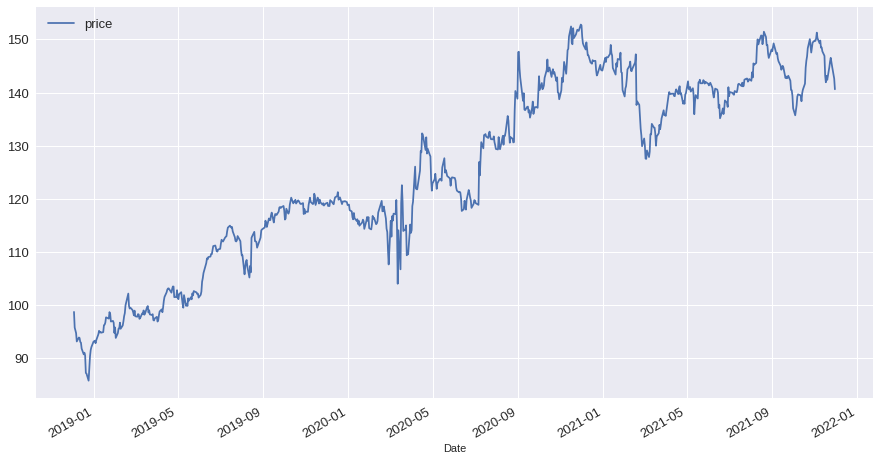

In [65]:
wmt.price.plot(figsize = (15,8),fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

## 01. Arithmetic Mean Return (Reward)

In [66]:
mu = wmt.returns.mean()
mu

0.0005688862589377016

## 02. Standard Deviation of Returns (Risk/Volatility)


In [67]:

sigma = wmt.returns.std()
sigma

0.014166546323641541

In [68]:
sigma = np.sqrt(wmt.returns.var())
sigma

0.014166546323641541

In [69]:
wmt.describe()

,price,returns
count,754.0000,753.0000
mean,125.2768,0.0006
std,17.2037,0.0142
min,85.8200,-0.0907
25%,113.9050,-0.0058
50%,123.9500,0.0002
75%,140.9900,0.0065
max,152.7900,0.1171


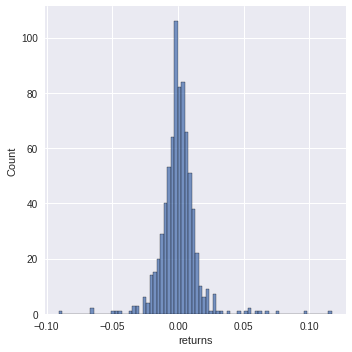

In [70]:
sns.displot(wmt.returns)
plt.show()

## 03. Investment Multiple (Reward)

More intuitive and easier to interpret in comparision with Arithmetic Mean Return.

It's simple the Ending Value of 1 unit (dollar) invested 

 $multiple = \frac{Ending\_Value}{Initial\_Investment}$

In [71]:
multiple = wmt.price[-1] / wmt.price[0]
multiple

1.4241013152689874

### 03.01. price Increase (%)

In [72]:
(multiple -1) * 100

42.410131526898745

### 03.02. Alternative

Compounding daily returns

$\frac{a_2}{a_1} \cdot \frac{a_3}{a_2} \cdot  \frac{a_4}{a_3} ... = \frac{a_n}{a_1}$

In [73]:
multiple_2 = (1 + wmt.returns).prod()
multiple_2

1.424101315268986

In [74]:
1 + wmt.returns

Date
2018-12-03      nan
2018-12-04   0.9702
2018-12-06   0.9891
2018-12-07   0.9833
2018-12-10   1.0080
              ...  
2021-11-23   1.0071
2021-11-24   1.0050
2021-11-26   0.9888
2021-11-29   0.9843
2021-11-30   0.9860
Name: returns, Length: 754, dtype: float64

### 03.02. Drawback 

It does not take into account investment period

## 04. CAGR Compound Annual Growth Rate (Reward) 

It does take into account the investiment period.

The (constant annual) rate of returns that would be required for an investment to grow from its beginning balance to its ending balance, assuming the profits were reinvested at the end of each year of the investemnt's lifespan.

CAGR can be used to compare investments with different investment horizons

$CAGR = multiple^{\frac{1}{years}} - 1 $

In [75]:
start = wmt.index[0]
end = wmt.index[-1]
delta = end - start
delta

Timedelta('1093 days 00:00:00')

In [76]:
delta_years = delta.days / 365
delta_years 

2.9945205479452053

In [77]:
cagr = multiple**(1 / delta_years) -1 
cagr

0.1253145828563853

## 05. Geometric Mean Return (daily) (Reward)

It's similar to the CAGR but in daily basis.

The geometric mean return is always smaller that the arithmetic mean return (daily)

$geo = multiple^{\frac{1}{n}}$

In [78]:
n = wmt.returns.count()
geo_mean = multiple ** (1/n) - 1
geo_mean

0.0004696201425014035